## Root-finding method : Newton-Raphson

## $$x_{new}=x_{old}-\frac{f(x_{old})}{f'(x_{old})} $$

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

## define a function 

In [4]:
def func(x):
    return x**3+2*x-2

## define derivative

In [9]:
def dfunc(x):
    return 3*x**2+2

## Newton-Raphson method

In [16]:
def newton(x0, tol):
    x_old = x0
    i = 1  # Start iteration from 1

    if dfunc(x0) == 0:
        print("This method doesn't work! The derivative is zero at the initial guess.")
        print("Please change the initial guess x0.")
        return None

    # First iteration
    x_new = x_old - func(x_old) / dfunc(x_old)  # NR formula
    
    Err = (abs(x_new - x_old) / abs(x_new)) * 100  # Relative error dalam persen
    

    

    # Print the first iteration
    print('{:2d}  {:8.4f}  {:8.4f}  {:8.4f}  {:8.4f}  {:8.4f}'.format(
        i, x_old, func(x_old), dfunc(x_old), x_new, Err))

    # Iterate while the error is greater than the tolerance
    while Err > tol:
        x_old = x_new
        x_new = x_old - func(x_old) / dfunc(x_old)  
        Err = (abs(x_new - x_old) / abs(x_new)) * 100  
        i= i+1  # Increment the iteration count

        # Print each iteration
        print('{:2d}  {:8.4f}  {:8.4f}  {:8.4f}  {:8.4f}  {:8.4f}'.format(
            i, x_old, func(x_old), dfunc(x_old), x_new, Err))

        # Stop if the function evaluates to zero
        if func(x_new) == 0:
            return x_new

    # Return the final root estimate
    return x_new

## Applying Newton-Raphson method on a function to find the root

In [17]:
print("iter   x_old   f(x_old)  f'(x_old)  x_new     Err(%)")
print("-----------------------------------------------------")

root=newton(7,0.01)

print("-------------------------------------------------------")        
print(f"The Root of f(x) is ",round(root,5)) 

iter   x_old   f(x_old)  f'(x_old)  x_new     Err(%)
-----------------------------------------------------
 1    7.0000  355.0000  149.0000    4.6174   51.5988
 2    4.6174  105.6828   65.9625    3.0153   53.1348
 3    3.0153   31.4454   29.2758    1.9412   55.3327
 4    1.9412    9.1971   13.3045    1.2499   55.3060
 5    1.2499    2.4525    6.6868    0.8831   41.5299
 6    0.8831    0.4551    4.3398    0.7783   13.4732
 7    0.7783    0.0280    3.8172    0.7710    0.9507
 8    0.7710    0.0001    3.7831    0.7709    0.0043
-------------------------------------------------------
The Root of f(x) is  0.77092


## using for-loop

In [74]:
def newtonraphson(x0,tol,maxit):
    x_old=x0
    
    if dfunc(x0) == 0:
        print("This method doesn't work! The derivative is zero at the initial guess.")
        print("Please change the initial guess x0.")
        return None
    
    #initialize x_new and Error
    x_new=x_old
    #Err=None
    err_list =[]
    
    # Iterate until maximum iteration or the error is lower or equals to tolerance
    for i in range (1,maxit+1):
        x_new = x_old - func(x_old) / dfunc(x_old)  
        Err = (abs(x_new - x_old) / abs(x_new)) * 100  
        

        # Print each iteration
        print('{:2d}  {:8.4f}  {:8.4f}  {:8.4f}  {:8.4f}  {:8.4f}'.format(
            i, x_old, func(x_old), dfunc(x_old), x_new, Err))
        
        
        err_list.append(Err)
        

        # Check if the error is equal or lower that tolerance
        if Err<tol:
            return x_new, err_list
        
        #update x_old for the next iteration
        x_old=x_new

    # Return the final root estimate & Error
    return x_new,err_list

iter   x_old   f(x_old)  f'(x_old)  x_new     Err(%)
-----------------------------------------------------
 1    5.0000  133.0000   77.0000    3.2727   52.7778
 2    3.2727   39.5988   34.1322    2.1126   54.9170
 3    2.1126   11.6534   15.3888    1.3553   55.8741
 4    1.3553    3.2001    7.5106    0.9292   45.8534
 5    0.9292    0.6608    4.5904    0.7853   18.3315
 6    0.7853    0.0548    3.8500    0.7710    1.8455
 7    0.7710    0.0005    3.7835    0.7709    0.0163
 8    0.7709    0.0000    3.7829    0.7709    0.0000
-------------------------------------------------------
The Root of f(x) is  0.77092


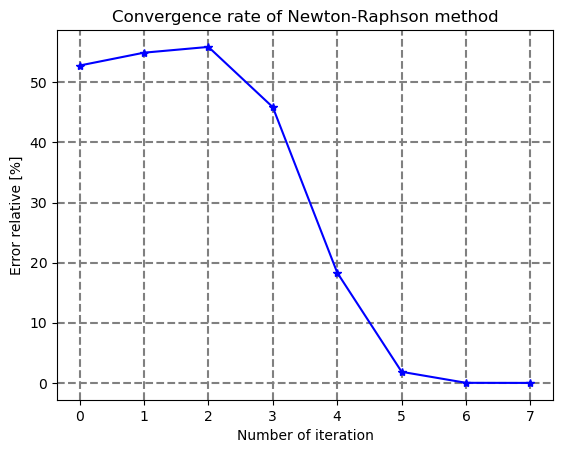

In [92]:
print("iter   x_old   f(x_old)  f'(x_old)  x_new     Err(%)")
print("-----------------------------------------------------")

root,err_list=newtonraphson(5,0.01,100)

print("-------------------------------------------------------")        
print(f"The Root of f(x) is ",round(root,5)) 

plt.plot(err_list,'b-*')
plt.grid(visible=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1.5)
plt.title('Convergence rate of Newton-Raphson method')
plt.xlabel('Number of iteration')
plt.ylabel('Error relative [%]')
plt.show()